In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [92]:
apple = pd.read_csv(r"D:\ml_pratice\apple product price list from 26 countries.csv")

<h1>EDA and Feature Engineering</h1>

In [93]:
apple.head()

,pid,model,price,country_code,country,region,income group,scraped_date
0,0,iPhone 13,"From A$1,199",au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
1,1,iPhone SE,From A$679,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
2,2,iPhone 12,From A$999,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
3,3,AirPods(3rd generation),A$279,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
4,4,AirPods Pro,A$399,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535


In [94]:
apple.shape

(448, 8)

In [95]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pid           448 non-null    int64 
 1   model         448 non-null    object
 2   price         448 non-null    object
 3   country_code  448 non-null    object
 4   country       448 non-null    object
 5   region        448 non-null    object
 6   income group  448 non-null    object
 7   scraped_date  448 non-null    object
dtypes: int64(1), object(7)
memory usage: 28.1+ KB


In [96]:
apple.isnull().sum()

pid             0
model           0
price           0
country_code    0
country         0
region          0
income group    0
scraped_date    0
dtype: int64

In [97]:
apple["model"].nunique()

109

In [98]:
apple["model"].unique()

array(['iPhone 13', 'iPhone SE', 'iPhone 12', 'AirPods(3rd generation)',
       'AirPods Pro', 'AirPods(2nd generation)', 'AirPods Max',
       'Apple TV 4K', 'Apple Watch SE', 'Apple Watch Series 3',
       'Sport Band', 'iPad', 'iPad Pro', 'Apple Pencil (2nd generation)',
       '24-inch iMac²', 'MacBook Air', 'Magic Mouse',
       'AirPods(3. Generation)', 'AirPods(2. Generation)', 'Apple TV HD',
       'Sportarmband', 'Apple Pencil (2. Generation)', '24" iMac²',
       'AirPods(2ª geração)', 'Pulseira esportiva',
       'Apple Pencil (2ª geração)', 'iMac de 24 polegadas²',
       'AirPods(3. generace)', 'AirPods(2. generace)',
       'Sportovní řemínek', 'Apple Pencil (2. generace)',
       '24palcový iMac²', 'AirPods(3. generation)',
       'AirPods(2. generation)', 'Sportsrem',
       'Apple Pencil (2. generation)', 'iPhone 13 Pro',
       'AirPods(3.ª generación)', 'AirPods(2.ª generación)',
       'Tarjeta regalo del Apple Store', 'Correa deportiva',
       'Apple Pencil (2.ª g

In [99]:
apple[apple["model"] == "สายแบบ Sport Band"]

,pid,model,price,country_code,country,region,income group,scraped_date
406,10,สายแบบ Sport Band,"฿1,600",th,Thailand,East Asia & Pacific,Upper middle income,2022-01-02 21:52:44.257695


In [100]:
apple[apple["model"] == "Spor Kordon"]

,pid,model,price,country_code,country,region,income group,scraped_date
424,11,Spor Kordon,499 TL,tr,Turkey,Europe & Central Asia,Upper middle income,2022-01-02 21:52:45.332201


In [101]:
apple[apple["model"] == "24 inç iMac²"]

,pid,model,price,country_code,country,region,income group,scraped_date
428,15,24 inç iMac²,Başlangıç fiyatı: 18.999 TL,tr,Turkey,Europe & Central Asia,Upper middle income,2022-01-02 21:52:45.332201


Into English

In [102]:
pip install deep-translator


Note: you may need to restart the kernel to use updated packages.


In [103]:
from deep_translator import GoogleTranslator

# Initialize the translator
translator = GoogleTranslator(source='auto', target='en')

# Translate the 'model' column and handle missing values
apple['model_english'] = apple['model'].apply(lambda x: translator.translate(x) if pd.notna(x) else None)

# Print the result
print(apple[['model', 'model_english']])


                             model                  model_english
0                        iPhone 13                      iPhone 13
1                        iPhone SE                      iPhone SE
2                        iPhone 12                      iPhone 12
3          AirPods(3rd generation)        AirPods(3rd generation)
4                      AirPods Pro                    AirPods Pro
..                             ...                            ...
443                       iPad Pro                       iPad Pro
444  Apple Pencil (2nd generation)  Apple Pencil (2nd generation)
445                  24-inch iMac²                  24-inch iMac²
446                    MacBook Air                    MacBook Air
447                    Magic Mouse                    Magic Mouse

[448 rows x 2 columns]


In [104]:
apple.tail()

,pid,model,price,country_code,country,region,income group,scraped_date,model_english
443,12,iPad Pro,From $799 or $66.58/mo. per month for 12 mo.*,us,United States,North America,High income,2022-01-02 21:52:47.021744,iPad Pro
444,13,Apple Pencil (2nd generation),$129 or $10.75/mo. per month for 12 mo.*,us,United States,North America,High income,2022-01-02 21:52:47.021744,Apple Pencil (2nd generation)
445,14,24-inch iMac²,From $1299 or $108.25/mo. per month for 12 mo.*,us,United States,North America,High income,2022-01-02 21:52:47.021744,24-inch iMac²
446,15,MacBook Air,From $999 or $83.25/mo. per month for 12 mo.*,us,United States,North America,High income,2022-01-02 21:52:47.021744,MacBook Air
447,16,Magic Mouse,$79,us,United States,North America,High income,2022-01-02 21:52:47.021744,Magic Mouse


In [105]:
apple["model_english"].unique()

array(['iPhone 13', 'iPhone SE', 'iPhone 12', 'AirPods(3rd generation)',
       'AirPods Pro', 'AirPods(2nd generation)', 'AirPods Max',
       'Apple TV 4K', 'Apple Watch SE', 'Apple Watch Series 3',
       'Sport Band', 'iPad', 'iPad Pro', 'Apple Pencil (2nd generation)',
       '24-inch iMac²', 'MacBook Air', 'Magic Mouse',
       'AirPods(3. Generation)', 'AirPods(2. Generation)', 'Apple TV HD',
       'Sportarmband', 'Apple Pencil (2. Generation)', '24" iMac²',
       'AirPods (2nd generation)', 'Sports bracelet',
       'AirPods (3rd generation)', 'Sports strap',
       'AirPods(3. generation)', 'AirPods(2. generation)', 'Sportsrem',
       'Apple Pencil (2. generation)', 'iPhone 13 Pro',
       'Apple Store Gift Card', 'Sport strap', 'Bracelet Sport',
       'iMac 24-inch²', 'Apple Pencil (second generation)',
       'AirPods(3rd Generation)', 'AirPods(2nd Generation)',
       'Sport Strap', 'Apple Pencil (2nd Generation)', 'iMac 24"²',
       'App Store & iTunes Cards', 'iMac²'

In [106]:
apple["model"].unique()

array(['iPhone 13', 'iPhone SE', 'iPhone 12', 'AirPods(3rd generation)',
       'AirPods Pro', 'AirPods(2nd generation)', 'AirPods Max',
       'Apple TV 4K', 'Apple Watch SE', 'Apple Watch Series 3',
       'Sport Band', 'iPad', 'iPad Pro', 'Apple Pencil (2nd generation)',
       '24-inch iMac²', 'MacBook Air', 'Magic Mouse',
       'AirPods(3. Generation)', 'AirPods(2. Generation)', 'Apple TV HD',
       'Sportarmband', 'Apple Pencil (2. Generation)', '24" iMac²',
       'AirPods(2ª geração)', 'Pulseira esportiva',
       'Apple Pencil (2ª geração)', 'iMac de 24 polegadas²',
       'AirPods(3. generace)', 'AirPods(2. generace)',
       'Sportovní řemínek', 'Apple Pencil (2. generace)',
       '24palcový iMac²', 'AirPods(3. generation)',
       'AirPods(2. generation)', 'Sportsrem',
       'Apple Pencil (2. generation)', 'iPhone 13 Pro',
       'AirPods(3.ª generación)', 'AirPods(2.ª generación)',
       'Tarjeta regalo del Apple Store', 'Correa deportiva',
       'Apple Pencil (2.ª g

In [107]:
new_apple = apple.copy()

In [108]:
new_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pid            448 non-null    int64 
 1   model          448 non-null    object
 2   price          448 non-null    object
 3   country_code   448 non-null    object
 4   country        448 non-null    object
 5   region         448 non-null    object
 6   income group   448 non-null    object
 7   scraped_date   448 non-null    object
 8   model_english  448 non-null    object
dtypes: int64(1), object(8)
memory usage: 31.6+ KB


In [109]:
new_apple.drop(columns = ["model"], inplace=True)

In [110]:
new_apple.head()

,pid,price,country_code,country,region,income group,scraped_date,model_english
0,0,"From A$1,199",au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,iPhone 13
1,1,From A$679,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,iPhone SE
2,2,From A$999,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,iPhone 12
3,3,A$279,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,AirPods(3rd generation)
4,4,A$399,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,AirPods Pro


In [111]:
new_apple["model_english"].nunique() 

61

In [112]:
new_apple = new_apple.rename(columns={'model_english': 'model'})

In [113]:
new_apple.head()

,pid,price,country_code,country,region,income group,scraped_date,model
0,0,"From A$1,199",au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,iPhone 13
1,1,From A$679,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,iPhone SE
2,2,From A$999,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,iPhone 12
3,3,A$279,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,AirPods(3rd generation)
4,4,A$399,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,AirPods Pro


In [114]:
# # remove the 'model' column
model_column = new_apple.pop('model')

# # Now, insert the model
new_apple.insert(1, 'model',model_column)


In [115]:
new_apple.head()

,pid,model,price,country_code,country,region,income group,scraped_date
0,0,iPhone 13,"From A$1,199",au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
1,1,iPhone SE,From A$679,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
2,2,iPhone 12,From A$999,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
3,3,AirPods(3rd generation),A$279,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535
4,4,AirPods Pro,A$399,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535


In [116]:
new_apple["price"].unique() 

array(['From A$1,199', 'From A$679', 'From A$999', 'A$279', 'A$399',
       'A$219', 'A$899', 'A$249', 'From A$429', 'From A$299', 'A$69',
       'From A$499', 'A$199', 'From A$1,899', 'From A$1,499', 'A$109',
       'Ab 799 €', 'Ab 479 €', 'Ab 679 €', '199 €', '279 €', '149 €',
       '629 €', '159 €', 'Ab 299 €', 'Ab 219 €', '49 €', 'Ab 379 €',
       'Ab 879 €', '135 €', 'Ab 1.449 €', 'Ab 1.129 €', '85 €',
       'A partir de R$ 6.599', 'A partir de R$ 3.699',
       'A partir de R$ 5.699', 'R$ 2.999', 'R$ 1.649', 'R$ 1.999',
       'R$ 2.399', 'A partir de R$ 3.799', 'A partir de R$ 2.599',
       'R$ 549', 'A partir de R$ 3.999', 'A partir de R$ 10.799',
       'R$ 1.599', 'A partir de R$ 17.599', 'A partir de R$ 12.999',
       'R$ 899', 'From $949', 'From $569', 'From $799', '$239', '$329',
       '$179', '$779', '$229', 'From $369', 'From $249', '$59',
       'From $429', 'From $999', '$169', 'From $1599', 'From $1299',
       '$89', 'Od 19 990 Kč', 'Od 11 690 Kč', 'Od 16 990 K

In [117]:
new_apple['final_price'] = new_apple['price'].str.extract('(\d[\d,\.]*)')  #remove string

new_apple['final_price'] = new_apple['final_price'].str.replace(',', '').astype(float) #convert into float 


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sujal\AppData\Local\Temp\ipykernel_25604\3354041116.py:1: SyntaxWarning: invalid escape sequence '\d'
  new_apple['final_price'] = new_apple['price'].str.extract('(\d[\d,\.]*)')  #remove string


In [118]:
new_apple.head()

,pid,model,price,country_code,country,region,income group,scraped_date,final_price
0,0,iPhone 13,"From A$1,199",au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,1199.0
1,1,iPhone SE,From A$679,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,679.0
2,2,iPhone 12,From A$999,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,999.0
3,3,AirPods(3rd generation),A$279,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,279.0
4,4,AirPods Pro,A$399,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,399.0


In [119]:
new_apple["final_price"].nunique()

230

In [120]:
new_apple["price"].nunique()

381

In [121]:
new_apple["final_price"].unique()

array([1.1990e+03, 6.7900e+02, 9.9900e+02, 2.7900e+02, 3.9900e+02,
       2.1900e+02, 8.9900e+02, 2.4900e+02, 4.2900e+02, 2.9900e+02,
       6.9000e+01, 4.9900e+02, 1.9900e+02, 1.8990e+03, 1.4990e+03,
       1.0900e+02, 7.9900e+02, 4.7900e+02, 1.4900e+02, 6.2900e+02,
       1.5900e+02, 4.9000e+01, 3.7900e+02, 8.7900e+02, 1.3500e+02,
       1.4490e+00, 1.1290e+00, 8.5000e+01, 6.5990e+00, 3.6990e+00,
       5.6990e+00, 2.9990e+00, 1.6490e+00, 1.9990e+00, 2.3990e+00,
       3.7990e+00, 2.5990e+00, 5.4900e+02, 3.9990e+00, 1.0799e+01,
       1.5990e+00, 1.7599e+01, 1.2999e+01, 9.4900e+02, 5.6900e+02,
       2.3900e+02, 3.2900e+02, 1.7900e+02, 7.7900e+02, 2.2900e+02,
       3.6900e+02, 5.9000e+01, 1.6900e+02, 1.5990e+03, 1.2990e+03,
       8.9000e+01, 1.9000e+01, 1.1000e+01, 1.6000e+01, 4.0000e+00,
       7.0000e+00, 3.0000e+00, 5.0000e+00, 1.0000e+00, 9.0000e+00,
       2.2000e+01, 3.7000e+01, 2.9000e+01, 2.0000e+00, 6.1270e+04,
       6.2550e+00, 3.6550e+00, 5.3550e+00, 1.5490e+00, 2.1990e

In [122]:
new_apple.head()

,pid,model,price,country_code,country,region,income group,scraped_date,final_price
0,0,iPhone 13,"From A$1,199",au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,1199.0
1,1,iPhone SE,From A$679,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,679.0
2,2,iPhone 12,From A$999,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,999.0
3,3,AirPods(3rd generation),A$279,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,279.0
4,4,AirPods Pro,A$399,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,399.0


In [123]:
new_apple["final_price"].unique()

array([1.1990e+03, 6.7900e+02, 9.9900e+02, 2.7900e+02, 3.9900e+02,
       2.1900e+02, 8.9900e+02, 2.4900e+02, 4.2900e+02, 2.9900e+02,
       6.9000e+01, 4.9900e+02, 1.9900e+02, 1.8990e+03, 1.4990e+03,
       1.0900e+02, 7.9900e+02, 4.7900e+02, 1.4900e+02, 6.2900e+02,
       1.5900e+02, 4.9000e+01, 3.7900e+02, 8.7900e+02, 1.3500e+02,
       1.4490e+00, 1.1290e+00, 8.5000e+01, 6.5990e+00, 3.6990e+00,
       5.6990e+00, 2.9990e+00, 1.6490e+00, 1.9990e+00, 2.3990e+00,
       3.7990e+00, 2.5990e+00, 5.4900e+02, 3.9990e+00, 1.0799e+01,
       1.5990e+00, 1.7599e+01, 1.2999e+01, 9.4900e+02, 5.6900e+02,
       2.3900e+02, 3.2900e+02, 1.7900e+02, 7.7900e+02, 2.2900e+02,
       3.6900e+02, 5.9000e+01, 1.6900e+02, 1.5990e+03, 1.2990e+03,
       8.9000e+01, 1.9000e+01, 1.1000e+01, 1.6000e+01, 4.0000e+00,
       7.0000e+00, 3.0000e+00, 5.0000e+00, 1.0000e+00, 9.0000e+00,
       2.2000e+01, 3.7000e+01, 2.9000e+01, 2.0000e+00, 6.1270e+04,
       6.2550e+00, 3.6550e+00, 5.3550e+00, 1.5490e+00, 2.1990e

In [124]:
new_apple['final_price'] = new_apple['final_price'].apply(lambda x: f"{x:.4f}")
print(new_apple)

     pid                          model  \
0      0                      iPhone 13   
1      1                      iPhone SE   
2      2                      iPhone 12   
3      3        AirPods(3rd generation)   
4      4                    AirPods Pro   
..   ...                            ...   
443   12                       iPad Pro   
444   13  Apple Pencil (2nd generation)   
445   14                  24-inch iMac²   
446   15                    MacBook Air   
447   16                    Magic Mouse   

                                               price country_code  \
0                                       From A$1,199           au   
1                                         From A$679           au   
2                                         From A$999           au   
3                                              A$279           au   
4                                              A$399           au   
..                                               ...          ...   


In [125]:
new_apple["final_price"].unique()

array(['1199.0000', '679.0000', '999.0000', '279.0000', '399.0000',
       '219.0000', '899.0000', '249.0000', '429.0000', '299.0000',
       '69.0000', '499.0000', '199.0000', '1899.0000', '1499.0000',
       '109.0000', '799.0000', '479.0000', '149.0000', '629.0000',
       '159.0000', '49.0000', '379.0000', '879.0000', '135.0000',
       '1.4490', '1.1290', '85.0000', '6.5990', '3.6990', '5.6990',
       '2.9990', '1.6490', '1.9990', '2.3990', '3.7990', '2.5990',
       '549.0000', '3.9990', '10.7990', '1.5990', '17.5990', '12.9990',
       '949.0000', '569.0000', '239.0000', '329.0000', '179.0000',
       '779.0000', '229.0000', '369.0000', '59.0000', '169.0000',
       '1599.0000', '1299.0000', '89.0000', '19.0000', '11.0000',
       '16.0000', '4.0000', '7.0000', '3.0000', '5.0000', '1.0000',
       '9.0000', '22.0000', '37.0000', '29.0000', '2.0000', '61270.0000',
       '6.2550', '3.6550', '5.3550', '1.5490', '2.1990', '1.2990',
       '1.4990', '2.2990', '1.6990', '2.8550', '6

In [126]:
new_apple.head()

,pid,model,price,country_code,country,region,income group,scraped_date,final_price
0,0,iPhone 13,"From A$1,199",au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,1199.0000
1,1,iPhone SE,From A$679,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,679.0000
2,2,iPhone 12,From A$999,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,999.0000
3,3,AirPods(3rd generation),A$279,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,279.0000
4,4,AirPods Pro,A$399,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,399.0000


In [127]:
new_apple.drop(columns = ["price"], inplace=True)

In [128]:
new_apple.head()

,pid,model,country_code,country,region,income group,scraped_date,final_price
0,0,iPhone 13,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,1199.0000
1,1,iPhone SE,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,679.0000
2,2,iPhone 12,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,999.0000
3,3,AirPods(3rd generation),au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,279.0000
4,4,AirPods Pro,au,Australia,East Asia & Pacific,High income,2022-01-02 21:52:06.630535,399.0000


In [129]:
new_apple['scraped_date'] = pd.to_datetime(new_apple['scraped_date'])


In [130]:
new_apple['date'] = new_apple['scraped_date'].dt.date
new_apple['time'] = new_apple['scraped_date'].dt.strftime('%H:%M:%S')

In [131]:
new_apple.drop(columns = ["scraped_date"],inplace = True)

In [132]:
new_apple.head()

,pid,model,country_code,country,region,income group,final_price,date,time
0,0,iPhone 13,au,Australia,East Asia & Pacific,High income,1199.0000,2022-01-02,21:52:06
1,1,iPhone SE,au,Australia,East Asia & Pacific,High income,679.0000,2022-01-02,21:52:06
2,2,iPhone 12,au,Australia,East Asia & Pacific,High income,999.0000,2022-01-02,21:52:06
3,3,AirPods(3rd generation),au,Australia,East Asia & Pacific,High income,279.0000,2022-01-02,21:52:06
4,4,AirPods Pro,au,Australia,East Asia & Pacific,High income,399.0000,2022-01-02,21:52:06


In [133]:
new_apple['date'] = pd.to_datetime(new_apple['date'], format='%Y-%m-%d')

In [134]:
new_apple['final_price'] = new_apple['final_price'].astype(float)

In [135]:
new_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pid           448 non-null    int64         
 1   model         448 non-null    object        
 2   country_code  448 non-null    object        
 3   country       448 non-null    object        
 4   region        448 non-null    object        
 5   income group  448 non-null    object        
 6   final_price   443 non-null    float64       
 7   date          448 non-null    datetime64[ns]
 8   time          448 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 31.6+ KB


In [136]:
new_apple["country"].unique()

array(['Australia', 'Austria', 'Brazil', 'Canada', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Finland', 'France', 'Hungary',
       'India', 'Ireland', 'Italy', 'Luxembourg', 'Mexico', 'Netherlands',
       'Norway', 'Philippines', 'Poland', 'Portugal', 'Russia', 'Sweden',
       'Thailand', 'Turkey', 'United States'], dtype=object)

In [137]:
country_to_currency = {
    'Australia': 'AUD',
    'Austria': 'EUR',
    'Brazil': 'BRL',
    'Canada': 'CAD',
    'Czech Republic': 'CZK',
    'Germany': 'EUR',
    'Denmark': 'DKK',
    'Spain': 'EUR',
    'Finland': 'EUR',
    'France': 'EUR',
    'Hungary': 'HUF',
    'India': 'INR',
    'Ireland': 'EUR',
    'Italy': 'EUR',
    'Luxembourg': 'EUR',
    'Mexico': 'MXN',
    'Netherlands': 'EUR',
    'Norway': 'NOK',
    'Philippines': 'PHP',
    'Poland': 'PLN',
    'Portugal': 'EUR',
    'Russia': 'RUB',
    'Sweden': 'SEK',
    'Thailand': 'THB',
    'Turkey': 'TRY',
    'United States': 'USD'
}
import requests
import pandas as pd

# API endpoint and key
API_KEY = 'e1fbcf80e4383fb1564eb5e0'  # Replace with your API key
url = f'https://v6.exchangerate-api.com/v6/e1fbcf80e4383fb1564eb5e0/latest/USD'

# Fetch exchange rates
response = requests.get(url)
if response.status_code == 200:
    exchange_rates = response.json()['conversion_rates']
else:
    raise Exception("Failed to fetch exchange rates. Check your API key or connection.")

# Add currency column
new_apple['currency'] = new_apple['country'].map(country_to_currency)
print(new_apple)
# Function to convert to USD
def convert_to_usd(price, currency):
    if currency in exchange_rates:
        return price / exchange_rates[currency]  # Convert to USD
    else:
        return None  # Handle unknown currencies

# Apply the conversion
new_apple['final_price_usd'] = new_apple.apply(
    lambda row: convert_to_usd(row['final_price'], row['currency']), axis=1
)
print(new_apple)

     pid                          model country_code        country  \
0      0                      iPhone 13           au      Australia   
1      1                      iPhone SE           au      Australia   
2      2                      iPhone 12           au      Australia   
3      3        AirPods(3rd generation)           au      Australia   
4      4                    AirPods Pro           au      Australia   
..   ...                            ...          ...            ...   
443   12                       iPad Pro           us  United States   
444   13  Apple Pencil (2nd generation)           us  United States   
445   14                  24-inch iMac²           us  United States   
446   15                    MacBook Air           us  United States   
447   16                    Magic Mouse           us  United States   

                  region income group  final_price       date      time  \
0    East Asia & Pacific  High income       1199.0 2022-01-02  21:52:06 

In [138]:
new_apple.head()

,pid,model,country_code,country,region,income group,final_price,date,time,currency,final_price_usd
0,0,iPhone 13,au,Australia,East Asia & Pacific,High income,1199.0,2022-01-02,21:52:06,AUD,754.088050
1,1,iPhone SE,au,Australia,East Asia & Pacific,High income,679.0,2022-01-02,21:52:06,AUD,427.044025
2,2,iPhone 12,au,Australia,East Asia & Pacific,High income,999.0,2022-01-02,21:52:06,AUD,628.301887
3,3,AirPods(3rd generation),au,Australia,East Asia & Pacific,High income,279.0,2022-01-02,21:52:06,AUD,175.471698
4,4,AirPods Pro,au,Australia,East Asia & Pacific,High income,399.0,2022-01-02,21:52:06,AUD,250.943396


In [139]:
new_apple.tail()

,pid,model,country_code,country,region,income group,final_price,date,time,currency,final_price_usd
443,12,iPad Pro,us,United States,North America,High income,799.0,2022-01-02,21:52:47,USD,799.0
444,13,Apple Pencil (2nd generation),us,United States,North America,High income,129.0,2022-01-02,21:52:47,USD,129.0
445,14,24-inch iMac²,us,United States,North America,High income,1299.0,2022-01-02,21:52:47,USD,1299.0
446,15,MacBook Air,us,United States,North America,High income,999.0,2022-01-02,21:52:47,USD,999.0
447,16,Magic Mouse,us,United States,North America,High income,79.0,2022-01-02,21:52:47,USD,79.0


In [140]:
new_apple.isnull().sum()

pid                0
model              0
country_code       0
country            0
region             0
income group       0
final_price        5
date               0
time               0
currency           0
final_price_usd    5
dtype: int64

In [141]:
new_apple = new_apple.dropna()

In [142]:
new_apple.drop(columns = ["pid"], inplace=True)

In [143]:
new_apple["model"].unique()

array(['iPhone 13', 'iPhone SE', 'iPhone 12', 'AirPods(3rd generation)',
       'AirPods Pro', 'AirPods(2nd generation)', 'AirPods Max',
       'Apple TV 4K', 'Apple Watch SE', 'Apple Watch Series 3',
       'Sport Band', 'iPad', 'iPad Pro', 'Apple Pencil (2nd generation)',
       '24-inch iMac²', 'MacBook Air', 'Magic Mouse',
       'AirPods(3. Generation)', 'AirPods(2. Generation)', 'Apple TV HD',
       'Sportarmband', 'Apple Pencil (2. Generation)', '24" iMac²',
       'AirPods (2nd generation)', 'Sports bracelet',
       'AirPods (3rd generation)', 'Sports strap',
       'AirPods(3. generation)', 'AirPods(2. generation)', 'Sportsrem',
       'Apple Pencil (2. generation)', 'iPhone 13 Pro', 'Sport strap',
       'Bracelet Sport', 'iMac 24-inch²',
       'Apple Pencil (second generation)', 'AirPods(3rd Generation)',
       'AirPods(2nd Generation)', 'Sport Strap',
       'Apple Pencil (2nd Generation)', 'iMac 24"²', 'iMac²',
       'Sports band', 'Apple Pencil (2e generatie)', 'AirP

<h1><b>Visualization </b></h1>

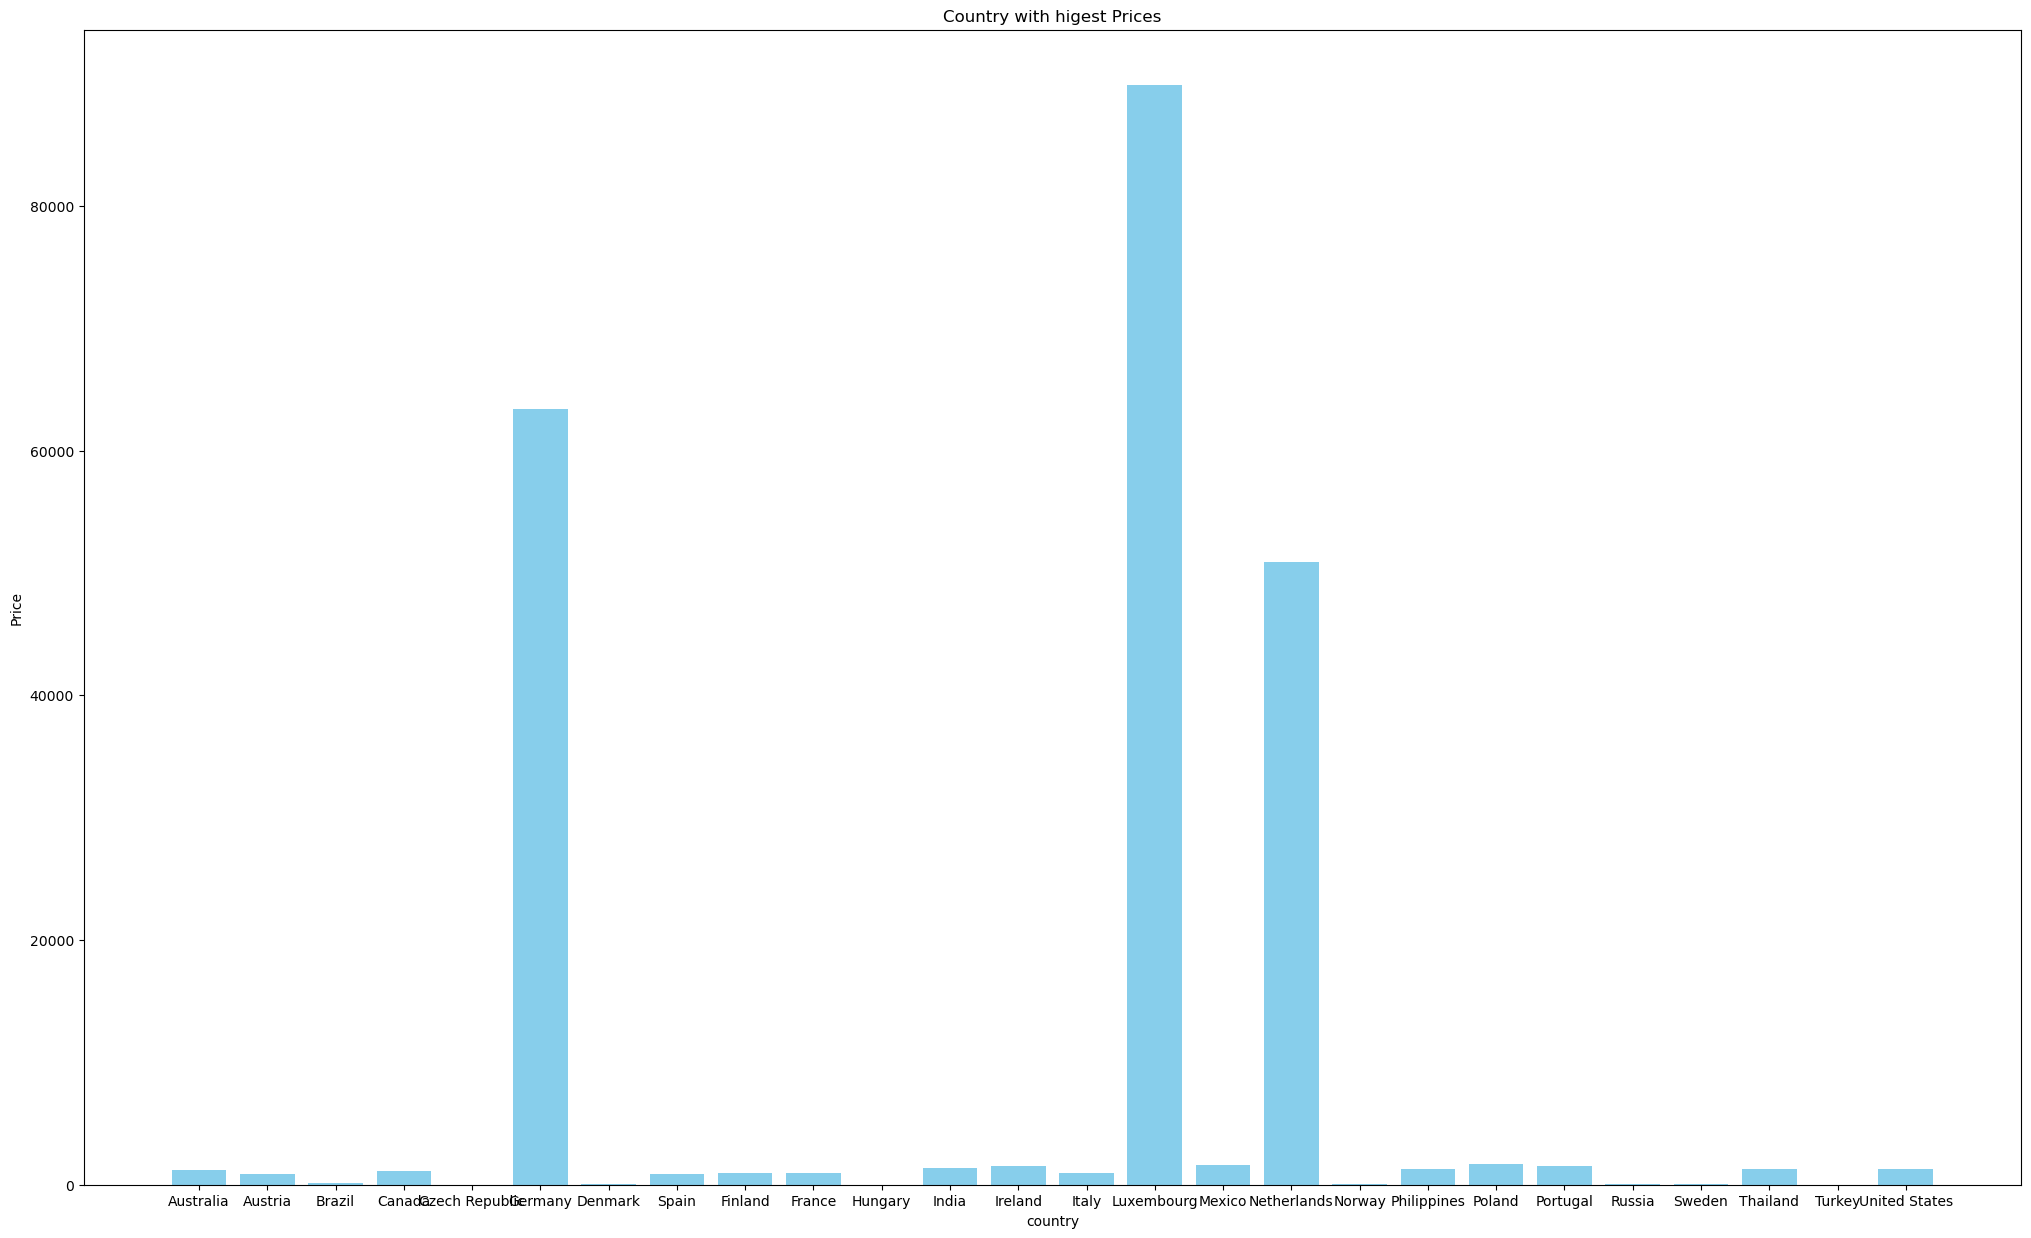

In [144]:
plt.figure(figsize=(25, 15))  # Set the figure size
plt.bar(new_apple['country'], new_apple['final_price_usd'], color='skyblue')

# Add labels and title
plt.xlabel('country')
plt.ylabel('Price')
plt.title('Country with higest Prices')

# Show the plot
plt.show()

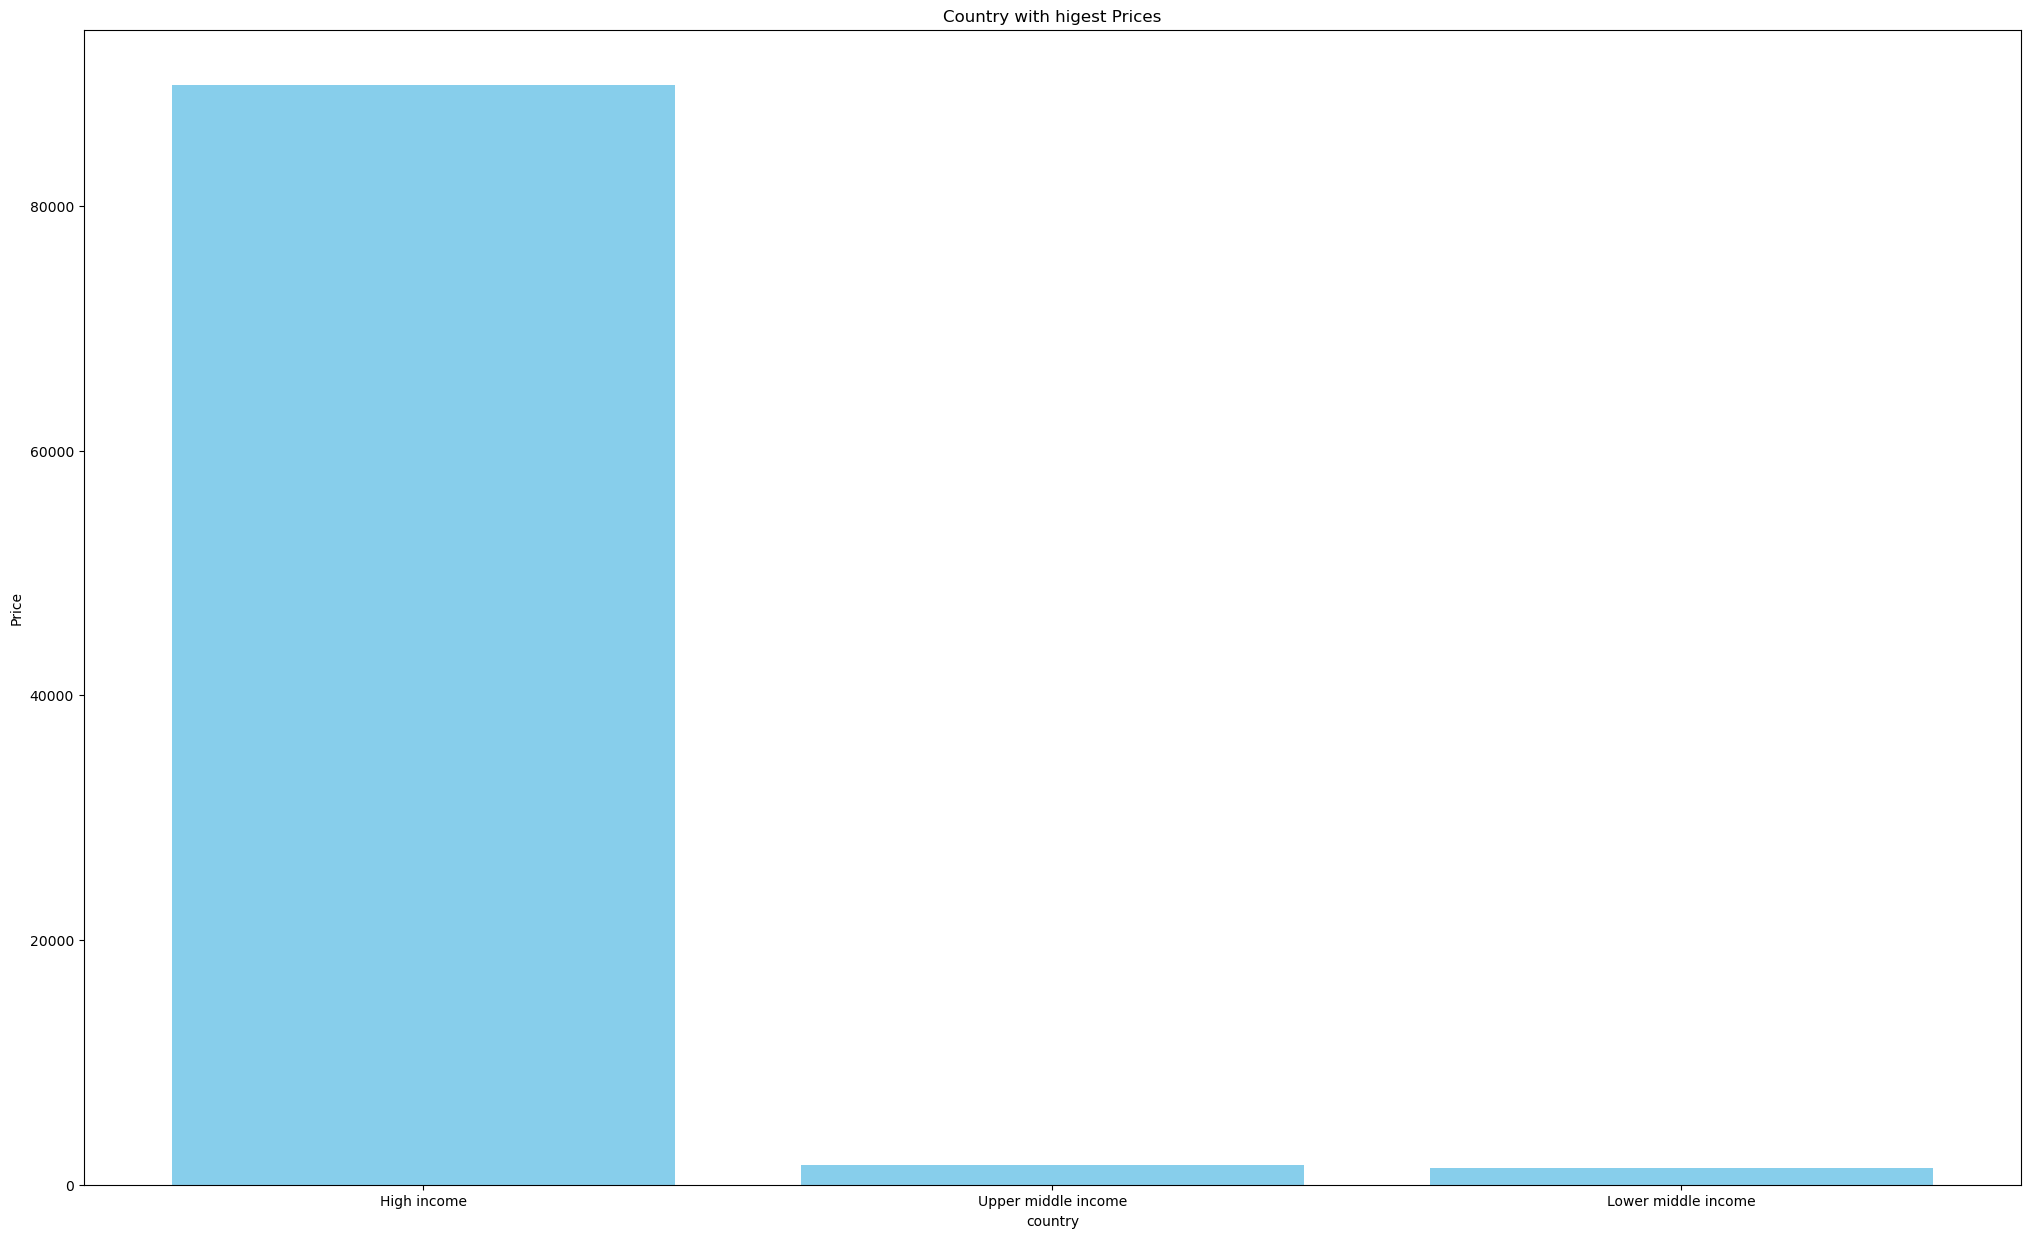

In [145]:
plt.figure(figsize=(25, 15))  # Set the figure size
plt.bar(new_apple['income group'], new_apple['final_price_usd'], color='skyblue')

# Add labels and title
plt.xlabel('country')
plt.ylabel('Price')
plt.title('Country with higest Prices')

# Show the plot
plt.show()

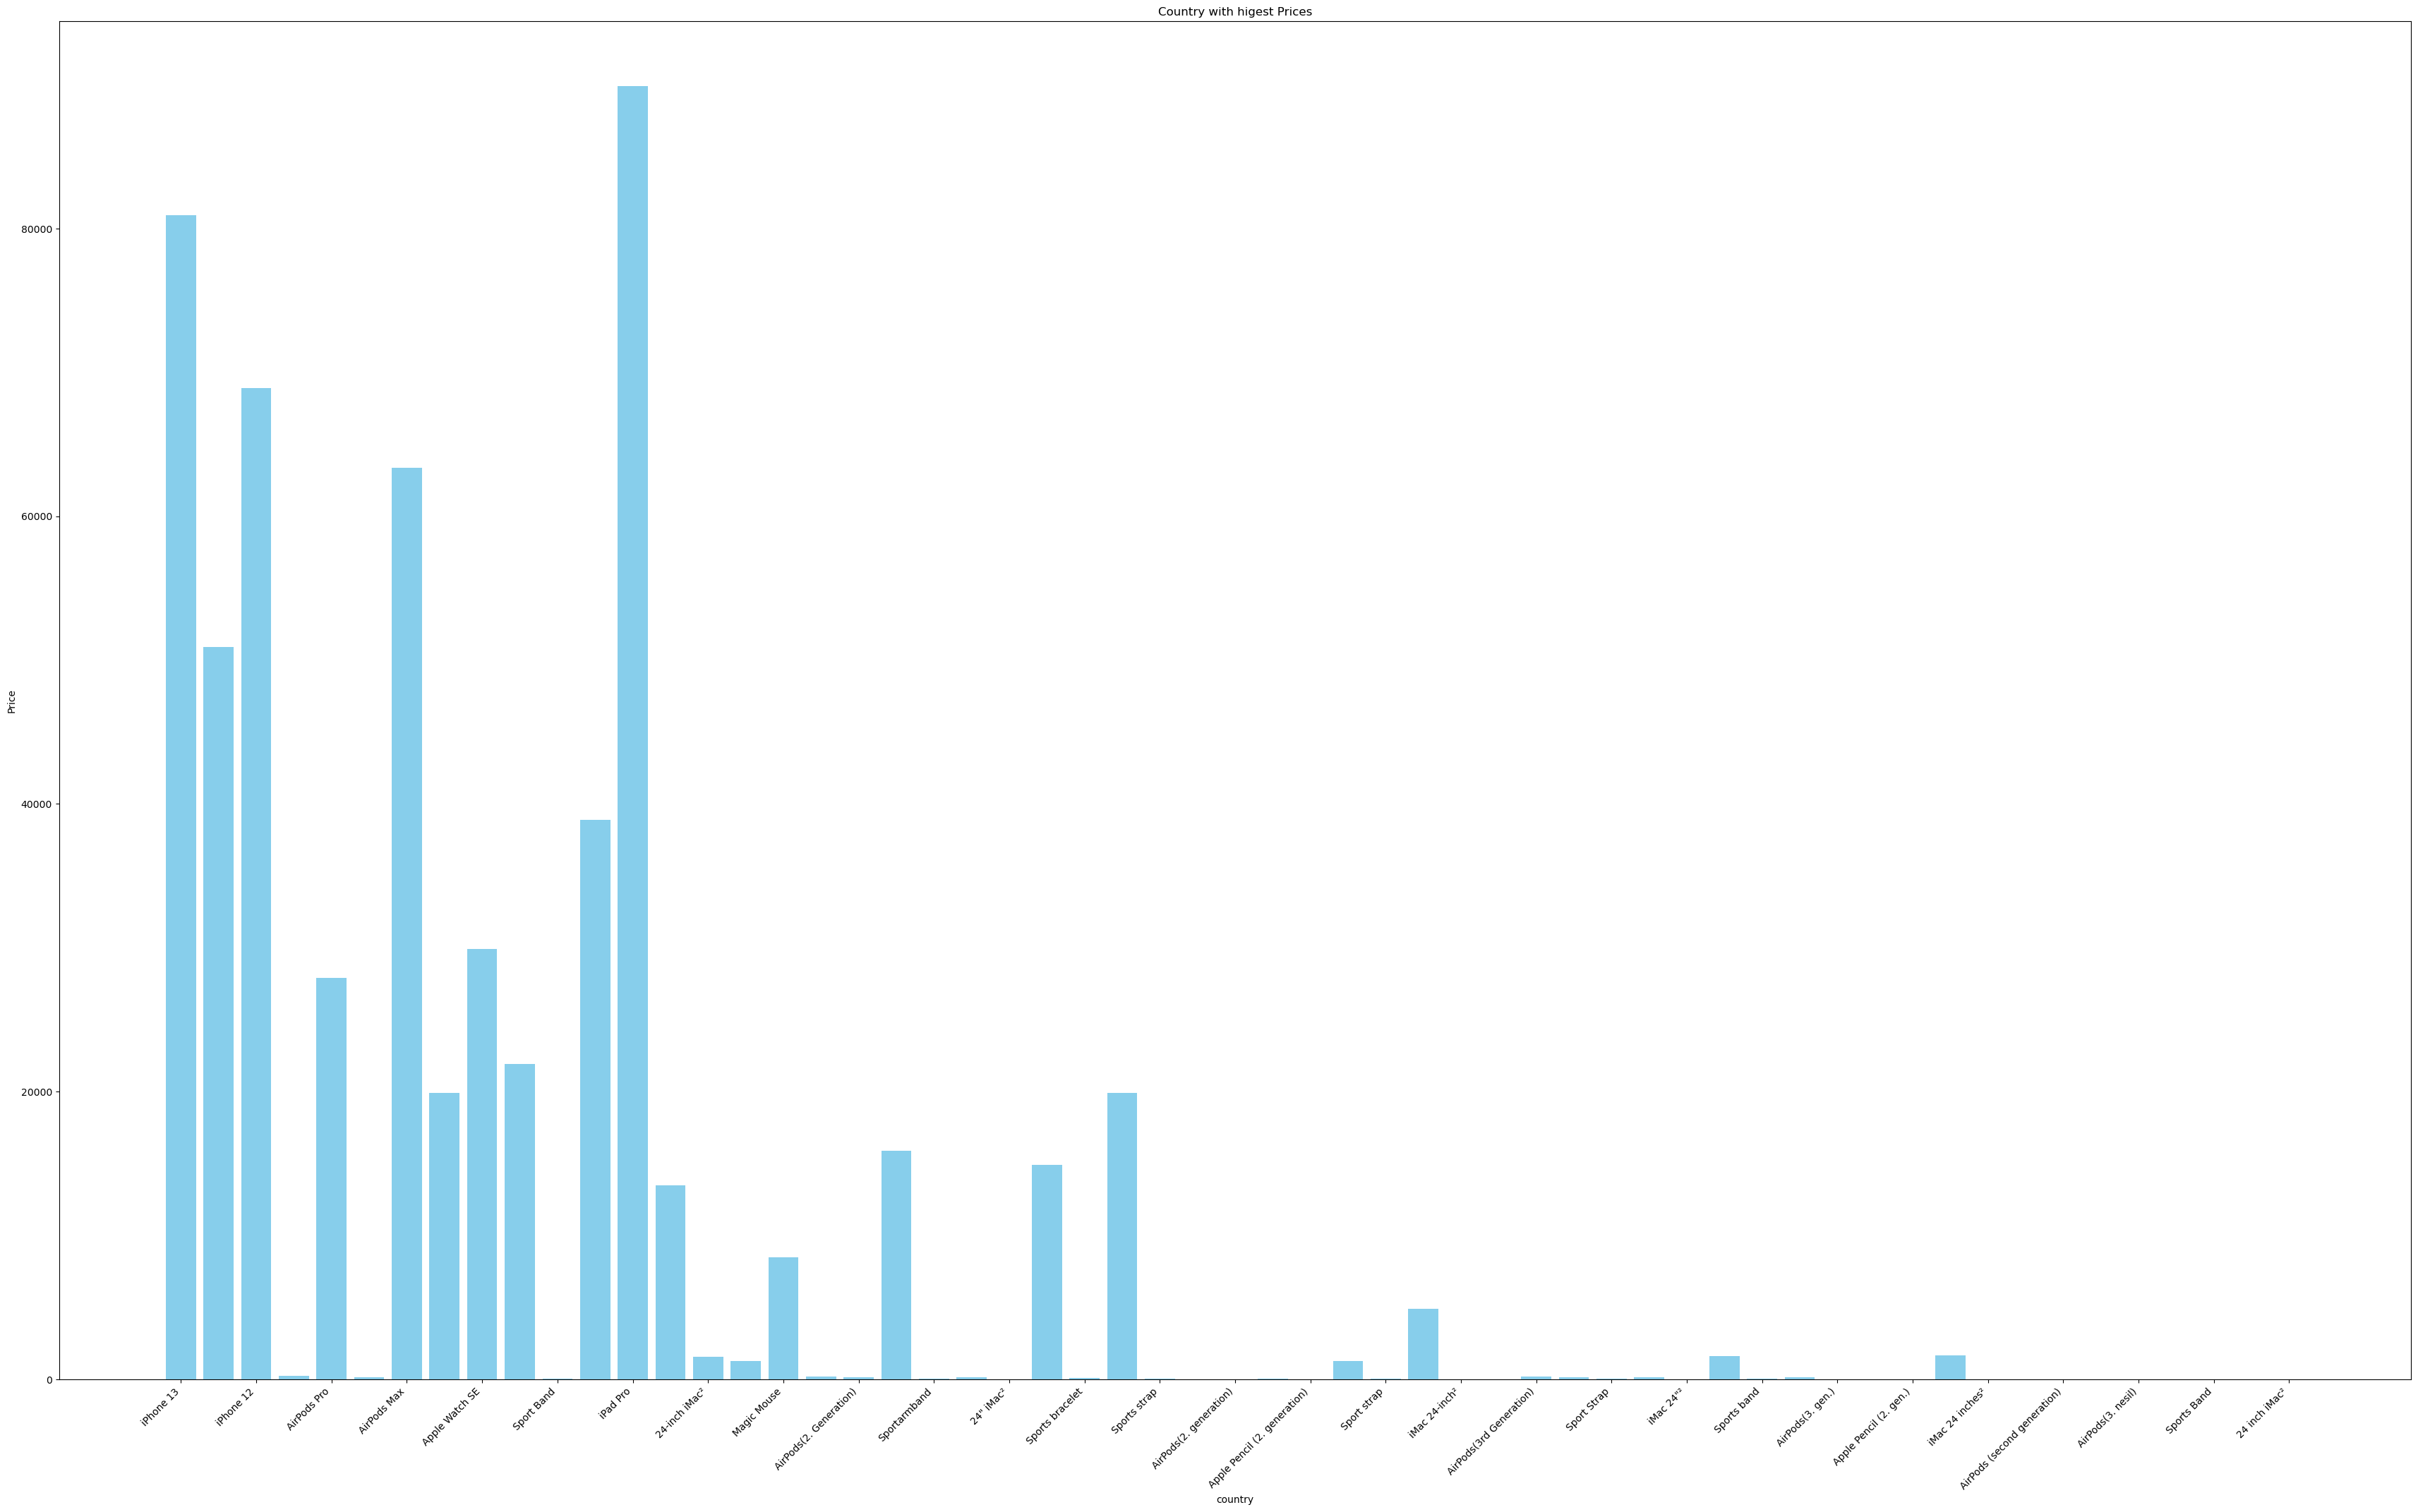

In [146]:
plt.figure(figsize=(43, 25))  # Set the figure size
plt.bar(new_apple["model"], new_apple["final_price_usd"], color="skyblue")
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.xticks(rotation=45, ha='right')  # Align text to the right
plt.xticks(ticks=plt.xticks()[0][::2])  # Show every second label

# Add labels and title
plt.xlabel("country")
plt.ylabel("Price")
plt.title("Country with higest Prices")

# Show the plot
plt.show()

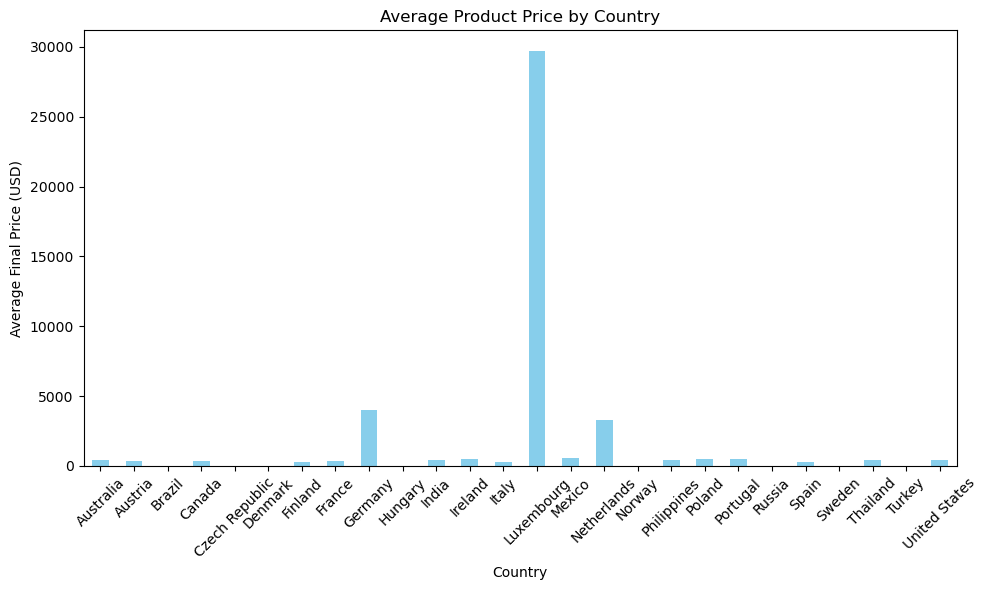

In [147]:
country_price = new_apple.groupby("country")["final_price_usd"].mean()
plt.figure(figsize=(10, 6))
country_price.plot(kind="bar", color="skyblue")

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Average Final Price (USD)")
plt.title("Average Product Price by Country")

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [148]:
new_apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 0 to 447
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   model            443 non-null    object        
 1   country_code     443 non-null    object        
 2   country          443 non-null    object        
 3   region           443 non-null    object        
 4   income group     443 non-null    object        
 5   final_price      443 non-null    float64       
 6   date             443 non-null    datetime64[ns]
 7   time             443 non-null    object        
 8   currency         443 non-null    object        
 9   final_price_usd  443 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 38.1+ KB


<h1> Model </h1> 

In [149]:
new_apple.head()

,model,country_code,country,region,income group,final_price,date,time,currency,final_price_usd
0,iPhone 13,au,Australia,East Asia & Pacific,High income,1199.0,2022-01-02,21:52:06,AUD,754.088050
1,iPhone SE,au,Australia,East Asia & Pacific,High income,679.0,2022-01-02,21:52:06,AUD,427.044025
2,iPhone 12,au,Australia,East Asia & Pacific,High income,999.0,2022-01-02,21:52:06,AUD,628.301887
3,AirPods(3rd generation),au,Australia,East Asia & Pacific,High income,279.0,2022-01-02,21:52:06,AUD,175.471698
4,AirPods Pro,au,Australia,East Asia & Pacific,High income,399.0,2022-01-02,21:52:06,AUD,250.943396


<h2>Linear regression</h2>

In [150]:
label_encoder = LabelEncoder()   #encoding 

new_apple['country_code'] = label_encoder.fit_transform(new_apple['country_code'])
new_apple['country'] = label_encoder.fit_transform(new_apple['country'])
new_apple['region'] = label_encoder.fit_transform(new_apple['region'])
new_apple['income group'] = label_encoder.fit_transform(new_apple['income group'])
new_apple['currency'] = label_encoder.fit_transform(new_apple['currency'])


In [151]:
#  features and target variable
X = new_apple[['country_code', 'country', 'region', 'income group', 'currency', 'final_price']]
y = new_apple['final_price_usd']

In [152]:
# Splitting 80% train nd  20% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
#  fitting data into model 
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [164]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 55905310.62105262
Coefficients: [ 1.36300232e+02  1.06581830e+02 -1.49480795e+03 -1.76440142e+03
 -5.09232126e+02  3.32593253e-01]
Intercept: 3018.8412030432837


In [155]:
print(y_pred)

[  762.91786802   873.72948735   970.19327146 -3117.28992839
   968.86289844   964.02252251 -3812.68544392  2025.07308221
   800.55897158 -3809.09343678 -3458.42940841   968.19771193
 -3813.11781515 -3116.29214863 -3498.34059883 -3813.45040841
  4227.48931139   841.65840132   970.19327146   241.96946392
  3254.58681753  2104.92144748 -1645.97754432  1239.74922438
  -623.19607998 19124.31778161  3894.8960579   1699.13169379
 -3431.82194813  2219.74906713 -1224.76678396   970.85845796
 -3522.49710665   840.72714021  2985.05592191  2757.88570519
   969.19549169 -3117.9551149  -3481.71093615  2823.58983501
   973.18661074   815.49118224   964.02252251  1113.28561653
  4689.1356975    980.17106906   969.52808495  -915.17005201
   966.01808203 15390.78427694  2271.9722474   2215.09276158
  3321.10546823   251.41209034  3653.69872172 -3342.02176969
  2462.54214217  3553.92074567  -689.71473067  2886.78255317
 -3648.1179695  -1695.86653234 -1824.49995209 -3448.45161081
  2029.15304581 25035.98

In [156]:
new_apple = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
new_apple.head()

,Actual,Predicted
336,247.448727,762.917868
138,516.135705,873.729487
72,0.288338,970.193271
367,0.135154,-3117.289928
73,0.123573,968.862898


<h2> Randomforest </h2>